In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
species = pd.read_csv('species_info.csv',encoding='utf-8')

In [77]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Observations:

This DataFrame contains observation data for various types of animals in specific national parks, including the number of times each animal was observed. The dataset is complete with no missing values.

In [108]:
print(observations.groupby('park_name').size(), '\n')
print(f'DataFrame shape(rows, columns): {observations.shape}')
print(f'\nMissing conservation statuses:\n\n {observations.isna().sum()}')

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64 

DataFrame shape(rows, columns): (23296, 3)

Missing conservation statuses:

 scientific_name    0
park_name          0
observations       0
dtype: int64


In [74]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Species:

This DataFrame contains observation data for various types of animals in specific national parks, including the number of times each animal was observed. The dataset includes both scientific and common names of the animals, along with their categories. The column with the highest number of missing values is conservation_status.

In [102]:
print(species.groupby('category').size(), '\n')
print(species.groupby('conservation_status').size(), '\n')
print(f'DataFrame shape(rows, columns): {species.shape}')
print(f'Missing conservation statuses: {species.conservation_status.isna().sum()}')

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64 

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64 

DataFrame shape(rows, columns): (5824, 4)
Missing conservation statuses: 5633


# Analysis

### Species data

#### Filling missing values:
    Given that a significant portion of the data has missing values, and there is a large amount of categorical data, we can set the missing values to "No Intervention".

In [109]:
species.fillna('No Intervention', inplace=True)
print(species.groupby('conservation_status').size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


In [136]:
conservationCat = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservationCat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


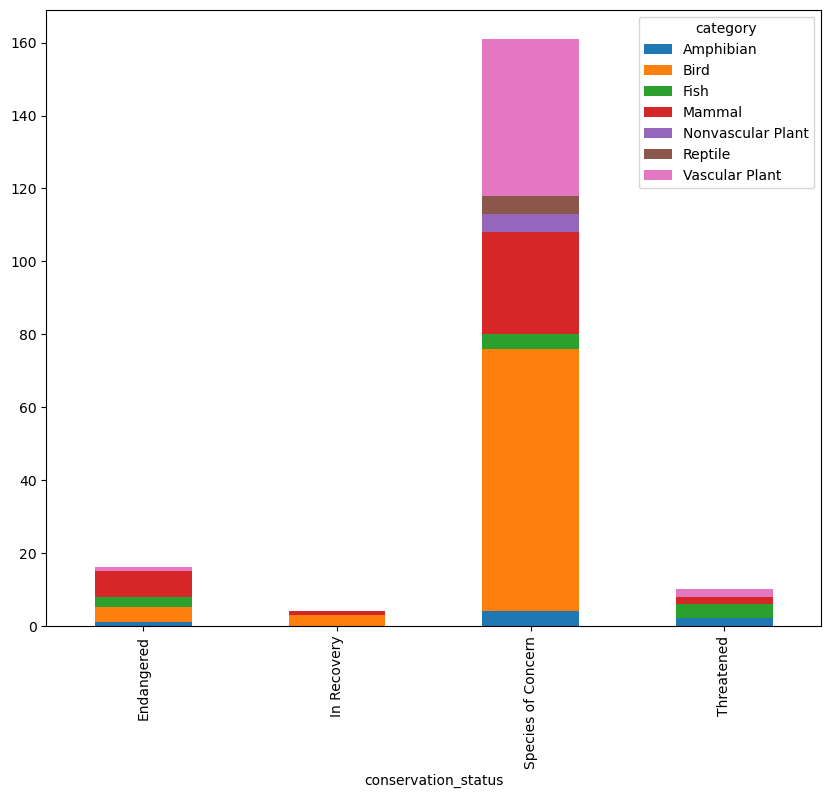

In [140]:
conservationCat.plot(kind='bar', figsize=(10, 8), stacked=True)

plt.show()

In [162]:
species['is_protected'] = np.where(species['conservation_status'] == 'No Intervention', 0, 1)
targetData = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
protectedSpecies = targetData[targetData['is_protected'] == 1].drop('is_protected', axis=1).reset_index().drop('index', axis=1)

protectedSpecies = protectedSpecies.rename(columns={'scientific_name': 'Protected Species'})

protectedSpecies

,category,Protected Species
0,Amphibian,7
1,Bird,75
2,Fish,11
3,Mammal,30
4,Nonvascular Plant,5
5,Reptile,5
6,Vascular Plant,46


In [202]:
categoriesCount = targetData.groupby(['category'])['scientific_name'].sum()
protectedSpecies['total_species'] = protectedSpecies['category'].map(categoriesCount)
protectedSpecies['protected_percentage'] = ((protectedSpecies['Protected Species'] / protectedSpecies['total_species']) * 100).round(2)

protectedSpecies

,category,Protected Species,protected_percentage,total_species
0,Amphibian,7,8.86,79
1,Bird,75,15.37,488
2,Fish,11,8.73,126
3,Mammal,30,17.05,176
4,Nonvascular Plant,5,1.50,333
5,Reptile,5,6.41,78
6,Vascular Plant,46,1.08,4262
